In [143]:
#import libraries

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Data Import

In [192]:
train_loss_path = '/content/drive/MyDrive/Dataset_hyperEarlyStop 2/train_loss.csv'
eval_loss_path = '/content/drive/MyDrive/Dataset_hyperEarlyStop 2/eval_loss.csv'
eval_acc_path = '/content/drive/MyDrive/Dataset_hyperEarlyStop 2/eval_acc.csv'
hp_space_path = '/content/drive/MyDrive/Dataset_hyperEarlyStop 2/HP_space.csv'

In [191]:
# provide appropriate paths to read csv
train_loss_df = pd.read_csv(train_loss_path)
eval_loss_df = pd.read_csv(eval_loss_path)
eval_acc_df = pd.read_csv(eval_acc_path)
hp_space_df = pd.read_csv(hp_space_path)

<ipython-input-191-38b13ffdf0c0>:2: DtypeWarning:

Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,26

In [145]:
train_loss_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,epoch_1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 7494,Unnamed: 7495,Unnamed: 7496,Unnamed: 7497,Unnamed: 7498,Unnamed: 7499,Unnamed: 7500,Unnamed: 7501,Unnamed: 7502,Unnamed: 7503
0,L1,H1,L2,H2,batch_1,batch_2,batch_3,batch_4,batch_5,batch_6,...,batch_41,batch_42,batch_43,batch_44,batch_45,batch_46,batch_47,batch_48,batch_49,batch_50
1,3,4,0,0,2.285,2.254,2.168,2.103,2.075,1.998,...,0.598,0.601,0.619,0.577,0.592,0.59,0.614,0.638,0.634,0.644
2,3,5,0,0,2.283,2.187,2.093,2.061,2.015,1.988,...,0.505,0.448,0.469,0.541,0.48,0.523,0.49,0.514,0.462,0.485
3,3,6,0,0,2.285,2.231,2.13,2.086,2.082,2.011,...,0.549,0.533,0.539,0.572,0.577,0.568,0.565,0.565,0.552,0.579
4,3,7,0,0,2.297,2.209,2.147,2.095,1.992,2.026,...,0.559,0.547,0.534,0.557,0.536,0.532,0.547,0.533,0.569,0.518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,3,4,8,6,2.295,2.202,2.143,2.1,2.083,2.042,...,0.805,0.849,0.793,0.743,0.816,0.752,0.788,0.81,0.797,0.829
199,3,4,8,8,2.295,2.226,2.16,2.1,2.096,2.059,...,0.825,0.774,0.815,0.787,0.841,0.857,0.862,0.836,0.803,0.8
200,3,4,8,10,2.3,2.23,2.18,2.145,2.111,2.027,...,0.69,0.639,0.687,0.674,0.705,0.727,0.704,0.658,0.697,0.692
201,3,4,8,12,2.307,2.231,2.175,2.132,2.065,2.046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
eval_loss_df

,L1,H1,L2,H2,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,...,epoch_141,epoch_142,epoch_143,epoch_144,epoch_145,epoch_146,epoch_147,epoch_148,epoch_149,epoch_150
0,3,4,0,0,1.52332,1.33248,1.27089,1.21834,1.20135,1.14159,...,1.02031,1.02160,1.02284,1.02495,1.04469,1.03849,1.02693,1.02176,1.02810,1.00954
1,3,5,0,0,1.42391,1.31039,1.14298,1.15141,1.05960,1.10058,...,0.90324,0.89469,0.90203,0.90636,0.89365,0.89999,0.91248,0.89115,0.89431,0.91435
2,3,6,0,0,1.51030,1.35697,1.24436,1.19246,1.16901,1.09636,...,0.98321,0.98734,0.99506,0.99040,0.98634,0.98861,0.98281,0.96875,0.98039,0.97649
3,3,7,0,0,1.49031,1.28391,1.21113,1.19441,1.09927,1.07175,...,0.92473,0.91630,0.90956,0.90825,0.92119,0.91781,0.91272,0.91210,0.91290,0.91833
4,3,8,0,0,1.42823,1.25468,1.18538,1.09234,1.04129,1.00743,...,0.88154,0.87421,0.87666,0.86612,0.86576,0.86915,0.87428,0.87241,0.88057,0.87955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,3,4,8,6,1.71504,1.58522,1.58067,1.51313,1.50656,1.43416,...,1.42088,1.40040,1.44347,1.51914,1.48245,1.38967,1.41427,1.38796,1.42785,1.50478
200,3,4,8,8,1.76575,1.59649,1.63956,1.52799,1.47745,1.41070,...,1.34234,1.32800,1.32745,1.31901,1.33631,1.31591,1.35848,1.33216,1.31453,1.33992
201,3,4,8,10,1.64943,1.51078,1.42041,1.33133,1.31672,1.32507,...,1.16164,1.17042,1.18172,1.19754,1.21205,1.15806,1.18568,1.13320,1.18360,1.19546
202,3,4,8,12,1.63926,1.55053,1.46117,1.41512,1.38881,1.31677,...,1.12982,1.14530,1.12501,1.13264,1.14269,1.13442,1.13576,1.15576,1.15447,1.13650


In [147]:
eval_acc_df

,L1,H1,L2,H2,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,...,epoch_141,epoch_142,epoch_143,epoch_144,epoch_145,epoch_146,epoch_147,epoch_148,epoch_149,epoch_150
0,3,4,0,0,0.4406,0.5187,0.5408,0.5667,0.5715,0.5954,...,0.6747,0.6711,0.6728,0.6693,0.6741,0.6778,0.6755,0.6765,0.6723,0.6712
1,3,5,0,0,0.4840,0.5188,0.5925,0.5950,0.6226,0.6209,...,0.7244,0.7220,0.7242,0.7213,0.7223,0.7243,0.7227,0.7230,0.7225,0.7228
2,3,6,0,0,0.4502,0.5097,0.5534,0.5717,0.5885,0.6129,...,0.6907,0.6872,0.6890,0.6874,0.6894,0.6884,0.6908,0.6875,0.6884,0.6903
3,3,7,0,0,0.4642,0.5356,0.5693,0.5785,0.6153,0.6260,...,0.7106,0.7103,0.7139,0.7145,0.7118,0.7117,0.7124,0.7111,0.7121,0.7133
4,3,8,0,0,0.4891,0.5453,0.5748,0.6139,0.6328,0.6514,...,0.7258,0.7287,0.7271,0.7307,0.7285,0.7293,0.7269,0.7275,0.7269,0.7289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,3,4,8,6,0.3824,0.4322,0.4656,0.4692,0.4921,0.5248,...,0.5811,0.5490,0.5802,0.5846,0.5748,0.5767,0.5671,0.5741,0.5644,0.5731
200,3,4,8,8,0.3723,0.4261,0.4466,0.4691,0.4793,0.5119,...,0.5728,0.5782,0.5674,0.5821,0.5930,0.5742,0.5602,0.5917,0.5815,0.5809
201,3,4,8,10,0.3998,0.4579,0.5098,0.5353,0.5305,0.5560,...,0.6320,0.6391,0.6345,0.6382,0.6403,0.6283,0.6342,0.6381,0.6399,0.6359
202,3,4,8,12,0.4094,0.4536,0.4823,0.4930,0.5193,0.5381,...,0.6413,0.6455,0.6371,0.6467,0.6488,0.6422,0.6432,0.6397,0.6399,0.6375


## Data Visualization

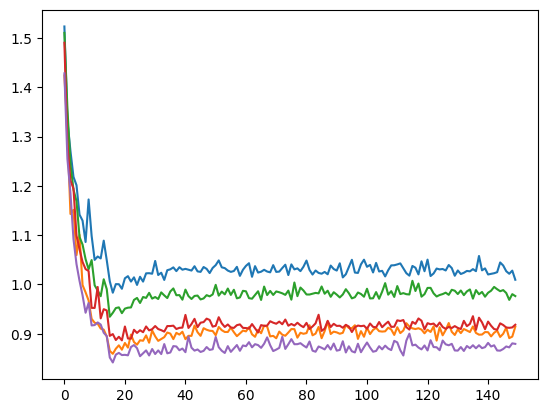

In [149]:
for i in range(5):
  plt.plot(eval_loss_df.iloc[i].values[4:])

Here we can see that for different values of hyperparameters the validation loss is decreasing rapdily for the first few epochs but after that it is almost constant. Also we can see this trend valid for different combinations of hyperparameters.



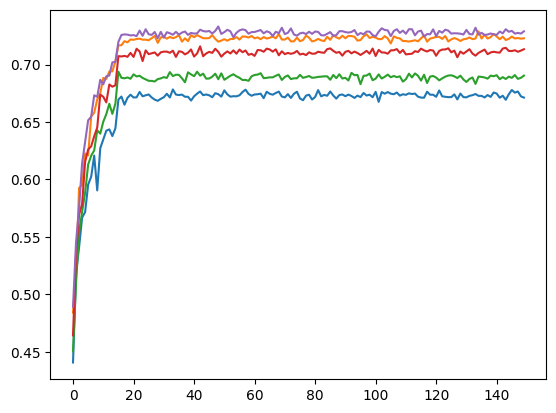

In [150]:
for i in range(5):
  plt.plot(eval_acc_df.iloc[i].values[4:])

The same trend is followed by accuracy as well.

We will keep both of these observations in mind and use it ahead.

### Mismatch in Train loss, Eval loss and Eval Acc

In [151]:
train_loss_df.shape

(203, 7504)

In [152]:
eval_loss_df.shape

(204, 154)

In [153]:
eval_acc_df.shape

(204, 154)

In [154]:
#logic to check the cause of mismatch in shape
for i in range(len(eval_acc_df)):
  if np.isnan(eval_acc_df.iloc[i].values[-1]):
    print(i+1)



94
95
204


In [155]:
train_loss_df.iloc[92:96,0:4]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
92,0,0,8,11
93,0,0,8,12
94,0,0,16,5
95,0,0,20,5


In [156]:
eval_loss_df.iloc[91:97,0:4]

,L1,H1,L2,H2
91,0,0,8,11
92,0,0,8,12
93,0,0,8,13
94,0,0,10,5
95,0,0,16,5
96,0,0,20,5


Here we can see that there is no record of hyperparameters <0 0 8 13> and <0 0 10 5> in train_loss. So we will eliminate both of these rows from eval loss and eval acc table.

In [157]:
eval_loss_df.drop(index =[93, 94], inplace = True)
eval_acc_df.drop(index =[93, 94], inplace = True)

In [158]:
eval_loss_df.reset_index(inplace = True)
eval_loss_df.drop(columns = ['index'], inplace = True)
eval_acc_df.reset_index(inplace = True)
eval_acc_df.drop(columns = ['index'], inplace = True)

In [159]:
eval_loss_df

,L1,H1,L2,H2,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,...,epoch_141,epoch_142,epoch_143,epoch_144,epoch_145,epoch_146,epoch_147,epoch_148,epoch_149,epoch_150
0,3,4,0,0,1.52332,1.33248,1.27089,1.21834,1.20135,1.14159,...,1.02031,1.02160,1.02284,1.02495,1.04469,1.03849,1.02693,1.02176,1.02810,1.00954
1,3,5,0,0,1.42391,1.31039,1.14298,1.15141,1.05960,1.10058,...,0.90324,0.89469,0.90203,0.90636,0.89365,0.89999,0.91248,0.89115,0.89431,0.91435
2,3,6,0,0,1.51030,1.35697,1.24436,1.19246,1.16901,1.09636,...,0.98321,0.98734,0.99506,0.99040,0.98634,0.98861,0.98281,0.96875,0.98039,0.97649
3,3,7,0,0,1.49031,1.28391,1.21113,1.19441,1.09927,1.07175,...,0.92473,0.91630,0.90956,0.90825,0.92119,0.91781,0.91272,0.91210,0.91290,0.91833
4,3,8,0,0,1.42823,1.25468,1.18538,1.09234,1.04129,1.00743,...,0.88154,0.87421,0.87666,0.86612,0.86576,0.86915,0.87428,0.87241,0.88057,0.87955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,3,4,8,6,1.71504,1.58522,1.58067,1.51313,1.50656,1.43416,...,1.42088,1.40040,1.44347,1.51914,1.48245,1.38967,1.41427,1.38796,1.42785,1.50478
198,3,4,8,8,1.76575,1.59649,1.63956,1.52799,1.47745,1.41070,...,1.34234,1.32800,1.32745,1.31901,1.33631,1.31591,1.35848,1.33216,1.31453,1.33992
199,3,4,8,10,1.64943,1.51078,1.42041,1.33133,1.31672,1.32507,...,1.16164,1.17042,1.18172,1.19754,1.21205,1.15806,1.18568,1.13320,1.18360,1.19546
200,3,4,8,12,1.63926,1.55053,1.46117,1.41512,1.38881,1.31677,...,1.12982,1.14530,1.12501,1.13264,1.14269,1.13442,1.13576,1.15576,1.15447,1.13650


##Data Preprocessing

In [160]:
# This function averages the batch loss for each epoch
def compute_fixed_window_means(array, window_size):
    result = hp_space_df.to_dict(orient = 'list')
    for row in array:
        ep_start = 1
        row_means = []
        for i in range(0, len(row), window_size):
            window = row[i:i + window_size]
            window_mean = window.mean()
            row_means.append(window_mean)
            if f'epoch_{ep_start}' not in result:
              result[f'epoch_{ep_start}'] = [window_mean]
            else:
              result[f'epoch_{ep_start}'].append(window_mean)
            ep_start+=1

    print(result['epoch_6'][0], result['epoch_141'][0])
    return pd.DataFrame(result)

# Set the window size
window_size = 50

# Compute the mean of every fixed 50 elements in each subarray
preprocessed_train_loss_df = compute_fixed_window_means(train_loss_df.iloc[1:,4:].values.astype('float64'), window_size)

1.22096 0.61248


In [161]:
hp_space_df

,L1,H1,L2,H2
0,3,4,0,0
1,3,5,0,0
2,3,6,0,0
3,3,7,0,0
4,3,8,0,0
...,...,...,...,...
197,3,4,8,6
198,3,4,8,8
199,3,4,8,10
200,3,4,8,12


In [162]:
train_loss_df.iloc[1:,4:].values.astype('float64').shape

(202, 7500)

In [163]:
preprocessed_train_loss_df

,L1,H1,L2,H2,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,...,epoch_141,epoch_142,epoch_143,epoch_144,epoch_145,epoch_146,epoch_147,epoch_148,epoch_149,epoch_150
0,3,4,0,0,1.80450,1.54360,1.42050,1.33836,1.26908,1.22096,...,0.61248,0.60748,0.61230,0.60868,0.61012,0.61070,0.61046,0.60910,0.60834,0.61230
1,3,5,0,0,1.75376,1.44356,1.31394,1.22598,1.15796,1.10530,...,0.49278,0.49394,0.49234,0.49246,0.49702,0.49482,0.50176,0.49344,0.49738,0.49230
2,3,6,0,0,1.79684,1.50790,1.37962,1.29922,1.23096,1.17964,...,0.57564,0.57206,0.57128,0.56894,0.57270,0.56658,0.56794,0.57460,0.57250,0.57316
3,3,7,0,0,1.77288,1.48226,1.34854,1.25930,1.19072,1.13940,...,0.54178,0.54388,0.54098,0.53854,0.54120,0.53982,0.54502,0.54274,0.53962,0.53982
4,3,8,0,0,1.73990,1.43634,1.29282,1.21294,1.14030,1.09298,...,0.50190,0.50562,0.50680,0.49996,0.50288,0.50872,0.50674,0.50060,0.50568,0.50094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,3,4,8,6,1.83082,1.57518,1.46098,1.38018,1.33344,1.28838,...,0.80160,0.79818,0.80018,0.79912,0.80508,0.80320,0.80080,0.79892,0.80616,0.79990
198,3,4,8,8,1.84684,1.60108,1.49028,1.42108,1.35814,1.31594,...,0.82264,0.82750,0.82486,0.82824,0.82528,0.82296,0.82638,0.82102,0.82062,0.82408
199,3,4,8,10,1.83730,1.56590,1.42932,1.34724,1.28120,1.22974,...,0.68256,0.67978,0.68174,0.68902,0.68134,0.68264,0.68878,0.68564,0.67574,0.68288
200,3,4,8,12,1.84690,1.60510,1.49576,1.42456,1.37116,1.32248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
eval_loss_df

,L1,H1,L2,H2,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,...,epoch_141,epoch_142,epoch_143,epoch_144,epoch_145,epoch_146,epoch_147,epoch_148,epoch_149,epoch_150
0,3,4,0,0,1.52332,1.33248,1.27089,1.21834,1.20135,1.14159,...,1.02031,1.02160,1.02284,1.02495,1.04469,1.03849,1.02693,1.02176,1.02810,1.00954
1,3,5,0,0,1.42391,1.31039,1.14298,1.15141,1.05960,1.10058,...,0.90324,0.89469,0.90203,0.90636,0.89365,0.89999,0.91248,0.89115,0.89431,0.91435
2,3,6,0,0,1.51030,1.35697,1.24436,1.19246,1.16901,1.09636,...,0.98321,0.98734,0.99506,0.99040,0.98634,0.98861,0.98281,0.96875,0.98039,0.97649
3,3,7,0,0,1.49031,1.28391,1.21113,1.19441,1.09927,1.07175,...,0.92473,0.91630,0.90956,0.90825,0.92119,0.91781,0.91272,0.91210,0.91290,0.91833
4,3,8,0,0,1.42823,1.25468,1.18538,1.09234,1.04129,1.00743,...,0.88154,0.87421,0.87666,0.86612,0.86576,0.86915,0.87428,0.87241,0.88057,0.87955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,3,4,8,6,1.71504,1.58522,1.58067,1.51313,1.50656,1.43416,...,1.42088,1.40040,1.44347,1.51914,1.48245,1.38967,1.41427,1.38796,1.42785,1.50478
198,3,4,8,8,1.76575,1.59649,1.63956,1.52799,1.47745,1.41070,...,1.34234,1.32800,1.32745,1.31901,1.33631,1.31591,1.35848,1.33216,1.31453,1.33992
199,3,4,8,10,1.64943,1.51078,1.42041,1.33133,1.31672,1.32507,...,1.16164,1.17042,1.18172,1.19754,1.21205,1.15806,1.18568,1.13320,1.18360,1.19546
200,3,4,8,12,1.63926,1.55053,1.46117,1.41512,1.38881,1.31677,...,1.12982,1.14530,1.12501,1.13264,1.14269,1.13442,1.13576,1.15576,1.15447,1.13650


In [165]:
eval_acc_df

,L1,H1,L2,H2,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,...,epoch_141,epoch_142,epoch_143,epoch_144,epoch_145,epoch_146,epoch_147,epoch_148,epoch_149,epoch_150
0,3,4,0,0,0.4406,0.5187,0.5408,0.5667,0.5715,0.5954,...,0.6747,0.6711,0.6728,0.6693,0.6741,0.6778,0.6755,0.6765,0.6723,0.6712
1,3,5,0,0,0.4840,0.5188,0.5925,0.5950,0.6226,0.6209,...,0.7244,0.7220,0.7242,0.7213,0.7223,0.7243,0.7227,0.7230,0.7225,0.7228
2,3,6,0,0,0.4502,0.5097,0.5534,0.5717,0.5885,0.6129,...,0.6907,0.6872,0.6890,0.6874,0.6894,0.6884,0.6908,0.6875,0.6884,0.6903
3,3,7,0,0,0.4642,0.5356,0.5693,0.5785,0.6153,0.6260,...,0.7106,0.7103,0.7139,0.7145,0.7118,0.7117,0.7124,0.7111,0.7121,0.7133
4,3,8,0,0,0.4891,0.5453,0.5748,0.6139,0.6328,0.6514,...,0.7258,0.7287,0.7271,0.7307,0.7285,0.7293,0.7269,0.7275,0.7269,0.7289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,3,4,8,6,0.3824,0.4322,0.4656,0.4692,0.4921,0.5248,...,0.5811,0.5490,0.5802,0.5846,0.5748,0.5767,0.5671,0.5741,0.5644,0.5731
198,3,4,8,8,0.3723,0.4261,0.4466,0.4691,0.4793,0.5119,...,0.5728,0.5782,0.5674,0.5821,0.5930,0.5742,0.5602,0.5917,0.5815,0.5809
199,3,4,8,10,0.3998,0.4579,0.5098,0.5353,0.5305,0.5560,...,0.6320,0.6391,0.6345,0.6382,0.6403,0.6283,0.6342,0.6381,0.6399,0.6359
200,3,4,8,12,0.4094,0.4536,0.4823,0.4930,0.5193,0.5381,...,0.6413,0.6455,0.6371,0.6467,0.6488,0.6422,0.6432,0.6397,0.6399,0.6375


As we can see that now all the dataframes are in same shape. But still there are some missing values in all three dataframes.

In [166]:
eval_acc_df.isnull().sum()

L1           0
H1           0
L2           0
H2           0
epoch_1      0
            ..
epoch_146    1
epoch_147    1
epoch_148    1
epoch_149    1
epoch_150    1
Length: 154, dtype: int64

as we can see here eval acc_150 has one null value so we will remove that row from all three dataframes

In [169]:
remove_indices = eval_acc_df[eval_acc_df.epoch_150.isna()].index.values

In [170]:
preprocessed_train_loss_df.drop(index = remove_indices, inplace = True)
eval_loss_df.drop(index = remove_indices, inplace = True)
eval_acc_df.drop(index = remove_indices, inplace = True)


Report the accuracies of the eval_acc of CifarNet predicted by the accModel on the test dataset in the following settings: (E=5, M=150), (E=10, M=150), (E=20, M=150), (E=30, M=150), (E=60, M=150).

In [171]:
hp_space_df

,L1,H1,L2,H2
0,3,4,0,0
1,3,5,0,0
2,3,6,0,0
3,3,7,0,0
4,3,8,0,0
...,...,...,...,...
197,3,4,8,6
198,3,4,8,8
199,3,4,8,10
200,3,4,8,12


In [172]:
#function to create appropriate early stop dataframe for training
def early_stop_dataframe(early_stop_epoch):
  t_loss_df = preprocessed_train_loss_df[f'epoch_{early_stop_epoch}']
  e_loss_df = eval_loss_df[f'epoch_{early_stop_epoch}']
  e_acc_df = eval_acc_df[[f'epoch_{early_stop_epoch}', 'epoch_150']]
  df = pd.concat([hp_space_df,t_loss_df, e_loss_df,e_acc_df], axis = 1)
  df.rename(columns = {'epoch_150':'output_acc_150'}, inplace = True)

  return df

In [173]:
#all 5 dataframes
five_epoch_df = early_stop_dataframe(5)
ten_epoch_df = early_stop_dataframe(10)
twenty_epoch_df = early_stop_dataframe(20)
thirty_epoch_df = early_stop_dataframe(30)
sixty_epoch_df = early_stop_dataframe(60)

Here we have prpared 5 dataframes to train individual accModels.

## Train-Validation-Test Split

In [174]:
train = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202]
validation= [3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63, 67, 71, 75, 79, 83, 87, 91, 95, 99, 103, 107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155, 159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199]
test= [5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201]


In [175]:
#create train validation and test dataframes
train_five_epoch_df = five_epoch_df[five_epoch_df.index.isin(train)]
validation_five_epoch_df = five_epoch_df[five_epoch_df.index.isin(validation)]
test_five_epoch_df =five_epoch_df[five_epoch_df.index.isin(test)]

train_ten_epoch_df = ten_epoch_df[ten_epoch_df.index.isin(train)]
validation_ten_epoch_df = ten_epoch_df[ten_epoch_df.index.isin(validation)]
test_ten_epoch_df =ten_epoch_df[ten_epoch_df.index.isin(test)]

train_twenty_epoch_df = twenty_epoch_df[twenty_epoch_df.index.isin(train)]
validation_twenty_epoch_df = twenty_epoch_df[twenty_epoch_df.index.isin(validation)]
test_twenty_epoch_df = twenty_epoch_df[twenty_epoch_df.index.isin(test)]

train_thirty_epoch_df = thirty_epoch_df[thirty_epoch_df.index.isin(train)]
validation_thirty_epoch_df = thirty_epoch_df[thirty_epoch_df.index.isin(validation)]
test_thirty_epoch_df = thirty_epoch_df[thirty_epoch_df.index.isin(test)]

train_sixty_epoch_df = sixty_epoch_df[sixty_epoch_df.index.isin(train)]
validation_sixty_epoch_df = sixty_epoch_df[sixty_epoch_df.index.isin(validation)]
test_sixty_epoch_df =sixty_epoch_df[sixty_epoch_df.index.isin(test)]

In [176]:
#split input and output dataframes
y_train = train_five_epoch_df[['output_acc_150']]
y_val = validation_five_epoch_df[['output_acc_150']]
y_test = test_five_epoch_df[['output_acc_150']]

x_train_5 = train_five_epoch_df.drop(columns = 'output_acc_150')
x_train_10 = train_ten_epoch_df.drop(columns = 'output_acc_150')
x_train_20 = train_twenty_epoch_df.drop(columns = 'output_acc_150')
x_train_30 = train_thirty_epoch_df.drop(columns = 'output_acc_150')
x_train_60 = train_sixty_epoch_df.drop(columns = 'output_acc_150')

x_val_5 = validation_five_epoch_df.drop(columns = 'output_acc_150')
x_val_10 = validation_ten_epoch_df.drop(columns = 'output_acc_150')
x_val_20 = validation_twenty_epoch_df.drop(columns = 'output_acc_150')
x_val_30 = validation_thirty_epoch_df.drop(columns = 'output_acc_150')
x_val_60 = validation_sixty_epoch_df.drop(columns = 'output_acc_150')

x_test_5 = test_five_epoch_df.drop(columns = 'output_acc_150')
x_test_10 = test_ten_epoch_df.drop(columns = 'output_acc_150')
x_test_20 = test_twenty_epoch_df.drop(columns = 'output_acc_150')
x_test_30 = test_thirty_epoch_df.drop(columns = 'output_acc_150')
x_test_60 = test_sixty_epoch_df.drop(columns = 'output_acc_150')

##Data Scaling/ Model Creation/ Model training and Model Evaluation Pipeline

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Import regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Example models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor()
}

# Define the datasets
datasets = {
    '5 epochs': (x_train_5, x_val_5),
    '10 epochs': (x_train_10, x_val_10),
    '20 epochs': (x_train_20, x_val_20),
    '30 epochs': (x_train_30, x_val_30),
    '60 epochs': (x_train_60, x_val_60)
}

# Function to create pipeline
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('regressor', model)           # The regression model
    ])

# Function to evaluate models on datasets
def evaluate_models(models, datasets, y_train, y_val):
    test_results = {}
    results = []

    for model_name, model in models.items():
        for dataset_name, (X_train, X_val) in datasets.items():
            pipeline = create_pipeline(model)
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_val)


            mse = mean_squared_error(y_val, y_pred)
            r2 = r2_score(y_val, y_pred)

            results.append({
                'Model': model_name,
                'Dataset': dataset_name,
                'MSE': mse,
                'R^2': r2
            })

    results_df = pd.DataFrame(results)
    return results_df

# Evaluate models
results_df = evaluate_models(models, datasets, y_train, y_val)

pivot_table_mse = results_df.pivot(index='Dataset', columns='Model', values='MSE')
pivot_table_r2 = results_df.pivot(index='Dataset', columns='Model', values='R^2')



/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning:

A column-vector y was p

From the table we can see that Linear Regression is outperforming every other models. Random Forest Regressor is also performing pretty well, but to train a random forest is more resource consuming so we will go with Linear regressor as our accModel.

In [186]:
import pickle
#test result generation
x_test_5.dropna(inplace = True)
x_test_10.dropna(inplace = True)
x_test_20.dropna(inplace = True)
x_test_30.dropna(inplace = True)
x_test_60.dropna(inplace = True)
y_test.dropna(inplace = True)

x_test_5.to_csv('XTest5.csv')
x_test_10.to_csv('XTest10.csv')
x_test_20.to_csv('XTest20.csv')
x_test_30.to_csv('XTest30.csv')
x_test_60.to_csv('XTest60.csv')
y_test.to_csv('yTest.csv')

train_test_data = {
    '5 epochs': (x_train_5,x_test_5),
    '10 epochs': (x_train_10,x_test_10),
    '20 epochs': (x_train_20,  x_test_20),
    '30 epochs': (x_train_30, x_test_30),
    '60 epochs': (x_train_60, x_test_60)
}
test_predictions = {}
test_results = {}
for test_data_name, (x_train,x_test) in train_test_data.items():
  pipeline = create_pipeline(LinearRegression())
  pipeline.fit(x_train, y_train)
  with open(f'model_{test_data_name}','wb') as f: #save each model
    pickle.dump(pipeline, f)
  y_pred = pipeline.predict(x_test)
  y_pred = [x[0] for x in y_pred]
  test_predictions[test_data_name] = y_pred
  r2 = r2_score(y_test, y_pred)
  test_results[test_data_name] = r2


<ipython-input-186-8493d63ae32e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
test_results

{'5 epochs': 0.9717847676971162,
 '10 epochs': 0.9790726914972185,
 '20 epochs': 0.9875005923818322,
 '30 epochs': 0.9942328941788945,
 '60 epochs': 0.9904671253211286}

In [189]:
import plotly.graph_objs as go
from plotly.offline import plot

# Convert dictionary to lists
epochs = list(test_results.keys())
values = list(test_results.values())

fig = go.Figure(data=[
    go.Bar(name='Test Accuracy', x=epochs, y=values)
])

# Adding title and labels
fig.update_layout(
    title='Linear Regressor Test Results',
    xaxis_title='Early Stop Epochs',
    yaxis_title='Test R2 Score',
    yaxis=dict(range=[0.95, 1.0]),  # Setting y-axis limits for better visualization
    barmode='group'
)

From the above graph one can notice that stopping at 30 epochs can be ideal to predict the final accuracy of ciphar-10 model.

## Test Accuracy Predictions

In [66]:
test_pred_df = pd.DataFrame(test_predictions)
test_pred_df.to_csv('test_predictions.csv')

In [69]:
final_predictions_df = pd.concat([test_pred_df,y_test.reset_index()], axis = 1)
final_predictions_df.drop(columns = ['index'], inplace = True)
final_predictions_df.rename(columns = {'5 epochs' : 'pred_acc_5', '10 epochs':'pred_acc_10', '20 epochs':'pred_acc_20', '30 epochs':'pred_acc_30', '60 epochs':'pred_acc_60'}, inplace = True)

In [70]:
final_predictions_df

,pred_acc_5,pred_acc_10,pred_acc_20,pred_acc_30,pred_acc_60,output_acc_150
0,0.732343,0.727967,0.732836,0.729410,0.728769,0.7308
1,0.739328,0.734371,0.730352,0.734188,0.731362,0.7304
2,0.688869,0.683695,0.689128,0.687570,0.693294,0.6860
3,0.714024,0.704386,0.709360,0.708188,0.709209,0.7098
4,0.723336,0.718457,0.715788,0.719551,0.721298,0.7171
5,0.660159,0.658005,0.656938,0.654327,0.655397,0.6559
6,0.684886,0.694406,0.691569,0.691964,0.691287,0.6882
7,0.714928,0.718323,0.718354,0.720301,0.715933,0.7168
8,0.638965,0.639274,0.642235,0.646263,0.649235,0.6440
9,0.662267,0.662957,0.669167,0.671339,0.673691,0.6717


In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df= final_predictions_df

#make subplots
fig = make_subplots(
    rows=3, cols=2, subplot_titles=(
        'Pred Acc 5 vs Output Acc', 'Pred Acc 10 vs Output Acc',
        'Pred Acc 20 vs Output Acc', 'Pred Acc 30 vs Output Acc',
        'Pred Acc 60 vs Output Acc'
    ),
    shared_xaxes=True, shared_yaxes=True
)

# Adding line plots to subplots
fig.add_trace(go.Scatter(x=df.index, y=df['pred_acc_5'], mode='lines+markers', name='Pred Acc 5'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['output_acc_150'], mode='lines+markers', name='Output Acc'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df['pred_acc_10'], mode='lines+markers', name='Pred Acc 10'), row=1, col=2)
fig.add_trace(go.Scatter(x=df.index, y=df['output_acc_150'], mode='lines+markers', name='Output Acc'), row=1, col=2)

fig.add_trace(go.Scatter(x=df.index, y=df['pred_acc_20'], mode='lines+markers', name='Pred Acc 20'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['output_acc_150'], mode='lines+markers', name='Output Acc'), row=2, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df['pred_acc_30'], mode='lines+markers', name='Pred Acc 30'), row=2, col=2)
fig.add_trace(go.Scatter(x=df.index, y=df['output_acc_150'], mode='lines+markers', name='Output Acc'), row=2, col=2)

fig.add_trace(go.Scatter(x=df.index, y=df['pred_acc_60'], mode='lines+markers', name='Pred Acc 60'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['output_acc_150'], mode='lines+markers', name='Output Acc'), row=3, col=1)

# Update layout
fig.update_layout(height=900, width=800, title_text="Comparison of Prediction Accuracies with Output Accuracy", showlegend=True)

# Show plot
fig.show()


From the above observation, one can clearly conclude that our accModels are able to predict the output accurately.